In [38]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
import numpy as np
from astropy.time import Time


In [39]:
#Reading the data
file= "fdot_xmm-nustar_obs.dat"
Data = np.loadtxt(file)


mjd = Data[:,0]
Freq = Data[:,1]

In [40]:
print(mjd)

print(Freq)

[58923.41541667 58943.82887153 58972.36673032 59030.38083333
 59031.92434028 59099.52295139 58923.4710706  58943.36010995
 59099.78876157 59130.73395833]
[0.73341022 0.73335405 0.73329004 0.73318165 0.73316316 0.73305014
 0.73341466 0.733359   0.73304277 0.73300908]


In [41]:
m, b = np.polyfit(mjd, Freq, 1, cov=True)
#m = slope, b = intercept

In [42]:
#So you need to return the covariance matrix, V, for which the square root
#of the diagonals are the estimated standard-deviation for each of the fitted coefficients. 
#This of course generalised to higher dimensions.
#best_fit = m[0]*mjd + b[0]
#best_fit = m*mjd + b
x1_error= (m[0],np.sqrt(b[0][0]))
x2_error= (m[1],np.sqrt(b[1][1]))
print(x1_error)
print(x2_error)

#print("x_1: {} +/- {}".format(m[0], np.sqrt(b[0][0])))
#print("x_2: {} +/- {}".format(m[1], np.sqrt(b[1][1])))
uncer = 5.7125533503184037e-08/86400
uncer
uncer_minus=6.611751562868523e-13

(-1.9850205875266524e-06, 5.7125533503184037e-08)
(0.8503633023641344, 0.0033709735850258504)


In [43]:
print('The slope', m)
#print('The intercept', b)
Fdot = m/86400 #Hz=1/s
print('The spin-freq derivative', Fdot)

The slope [-1.98502059e-06  8.50363302e-01]
The spin-freq derivative [-2.29747753e-11  9.84216785e-06]


In [60]:
best_fit = (m*mjd) + b
b.shape, m.shape, mjd.shape

((), (), (10,))

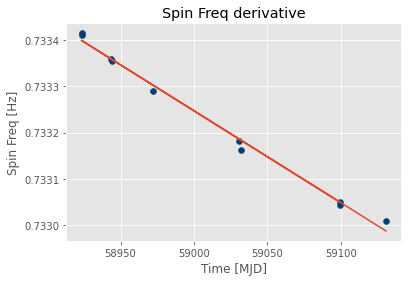

In [64]:
style.use('ggplot')
plt.scatter(mjd, Freq,color='#003F72')
plt.plot(mjd, best_fit)
#plt.errorbar(mjd, Freq, yerr=[uncer_minus,uncer])
plt.xlabel("Time [MJD]")
plt.ylabel("Spin Freq [Hz]")
plt.title("Spin Freq derivative")
plt.savefig("fdot_nustar_obs.png")

In [62]:
m*86400

-0.17150577884352805

In [47]:
#F0 = 0.73341022
#t0 = 58923.41541667
#F = F0 + Fdot*(mjd-t0)*86400

#print(Fdot)

In [48]:
#F(t) = F0 + Fdot*(t-t0), where F0 is the frequency at time t0 and t0 is the time of your first observation. The uncertainty on the slope should be provided by the fitting function you use (usually).

In [59]:
#https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/
#Reading the data
file= "fdot_xmm-nustar_obs.dat"
data = np.loadtxt(file)

xs = data[:,0]
ys = data[:,1]

from statistics import mean
import numpy as np


def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m)
mm = m/86400 #fdot
print("My work Fdot", mm)
print("NICER paper, Fdot -2.48e-11")

-1.98502058846676e-06
My work Fdot -2.2974775329476387e-11
NICER paper, Fdot -2.48e-11


In [53]:
regression_line = [(m*x)+b for x in xs]

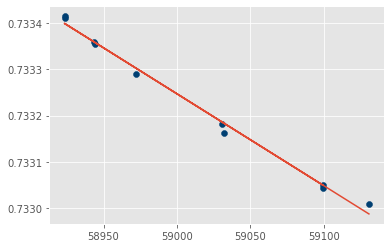

In [54]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
#This will allow us to make graphs, and make them not so ugly. Now at the end:

plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()